In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
folder = 'data/all_magnitudes/for_GDR3mock_comparison/'
data_all = np.load(folder + 'result.npy')
bins_all = np.load(folder + 'all_bins.npy')

In [3]:
#write a function that cuts the data to a specific mag bin

def decrease_hpx(data,ntimes):
    for i in range(ntimes):
        data = data[0::4,:] + data[1::4,:] + data[2::4,:] + data[3::4,:]
    return(data)
def total_mag_function(data):
    return(np.sum(data,axis=0))

def density_sky(data):
    return(np.sum(data,axis=1))
def last_complete_bin(data,bins):
    max_values = np.max(data[:,:], axis = 1)
    mag_limit = np.zeros(len(data))
    for i,item in enumerate(data[:,:]):
        #print(i,item)
        cut = np.where(item == max_values[i])
        mag_limit[i] = bins[cut[0][0]]
    return(mag_limit)
def get_mag_bin(data,bins,mag):
    assert(mag in bins)
    cut = np.where(bins==mag)[0]
    #print(cut)
    return(data[:,cut][:,0])

In [4]:
def plot_mollweide_log(data):
    import os
    import healpy as hp
    from defaults import getLogTickMarks
    from matplotlib.colors import LogNorm
    from colormap import getParulaColormap
    import matplotlib.pylab as plt

    cmap = getParulaColormap()
    norm = LogNorm()
    map_mollweide = data
    cbLabel=r'$n_\mathrm{stars}$ (for hp level %d)' %(np.log(len(map_mollweide)/12)/np.log(4))
        
    minVal = 0.1#np.nanmin(map_mollweide[map_mollweide>0])
    maxVal = 5e4#np.nanmax(map_mollweide[map_mollweide<+np.inf])
    maxVal = np.max(data)
    total = sum(map_mollweide)
    map_mollweide[map_mollweide<minVal] = 0.1
    hp.mollview(map_mollweide,cmap = cmap, cbar = None, min=minVal, max=maxVal, nest = True,norm = norm, coord= "CG", unit = 'starcount',notext =True)
    plt.title("GDR2all: starcount=%d" %(total))
        
    fig = plt.gcf()
    ax = plt.gca()
    pos1 = ax.get_position() # get the original position 
    pos2 = [pos1.x0, pos1.y0 + 0.06,  pos1.width, pos1.height]
    ax.set_position(pos2) # set a new position
    im = ax.get_images()[0]

    cbAx = fig.add_axes([0.1, 0.12, 0.8, 0.03])
    cb = plt.colorbar(im, cax=cbAx, orientation='horizontal', )
    cb.ax.minorticks_on()

    tickMarks = getLogTickMarks(minVal, maxVal)
    minorticks = im.norm(tickMarks)
    cb.ax.xaxis.set_ticks(minorticks, minor=True)

    cb.solids.set_edgecolor("face")
    cb.set_label(cbLabel)
    #plt.savefig(folder + "log_mollweide_counts_%.2f.png" %(mag), dpi = 100)
        
    #plt.clf()
    #plt.close()
    plt.show()

In [5]:
def plot_mollweide_linear_mag(data,mag):
    import healpy as hp
    import matplotlib.pylab as plt

    map_mollweide = data
    hp.mollview(map_mollweide, cbar = True, nest = True, coord= "CG", unit = 'completeness',notext =True,min = 0, max = 1)
    #plt.title("photometric quality (C2)")
    #plt.savefig(folder + "log_mollweide_counts_%.2f.png" %(mag), dpi = 100)
    plt.title("Fbol stars divided by full GDR2 at G=%.1f" %(mag))
    plt.savefig('plots/per_mag_bin/fbol_new/Fbol_completeness_%.1f.png' %(mag))    
    plt.clf()
    plt.close()
    #plt.show()

In [6]:
def plot_mollweide_linear(data, band):
    import healpy as hp
    import matplotlib.pylab as plt

    map_mollweide = data
    hp.mollview(map_mollweide, cbar = True, nest = True, coord= "CG", unit = 'G [mag]',notext =True,min = 17.0, max = 20.7)
    #plt.title("photometric quality (C2)")
    #plt.savefig(folder + "log_mollweide_counts_%.2f.png" %(mag), dpi = 100)
    #for item in [[3, -4],[270, 60],[30, 0],[240, 0]]:
    #    hp.projplot(item[0], item[1], 'bo', lonlat = True)  # plot 'o' in blue at coord (theta, phi)
    plt.title("maglim for nside 128 in %s mag" %(band))
    plt.show()    
    #plt.clf()
    #plt.close()
    #plt.show()

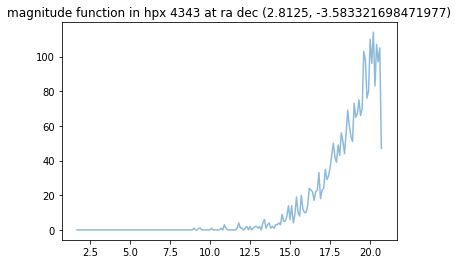

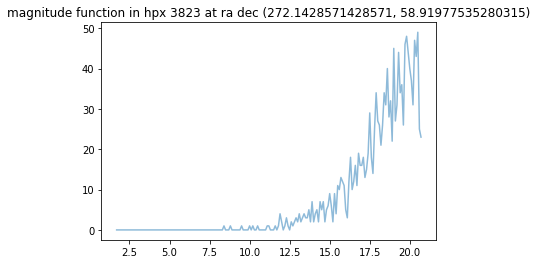

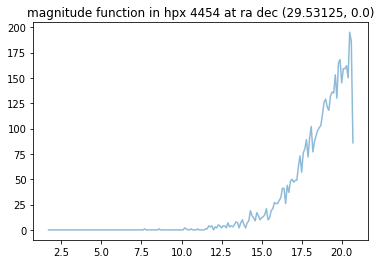

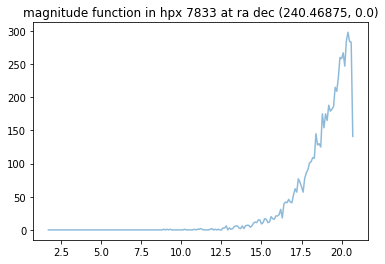

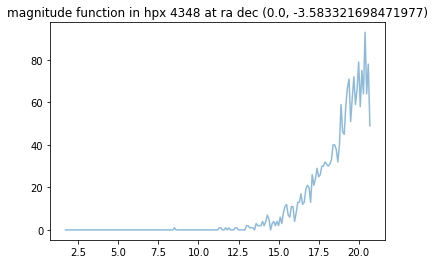

<Figure size 432x288 with 0 Axes>

In [7]:
# Showing the starcount per healpix binned in magnitude

import healpy as hp
healpix_number = []
for item in [[3, -4],[270, 60],[30, 0],[240, 0],[0,-4]]:
    healpix_number.append(hp.ang2pix(32,item[0],item[1],nest = True, lonlat = True))
for i in healpix_number:
    plt.plot(bins_all,data_all[i],alpha=0.5,label="GDR2-Fbol")
    #plt.plot(bins_qual,data_qual[i],alpha=0.5,label="Fbol")
    plt.title("magnitude function in hpx %d at ra dec %s" %(i, str(hp.pix2ang(32,i,lonlat=True,nest=True))))
    #plt.yscale('log')
    plt.show()
    plt.clf()
    

/home/rybizki/Desktop/GDR2_stuff/Selection Function/defaults.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/rybizki/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/rybizki/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/rybizki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/rybizki/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/rybizki/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    i

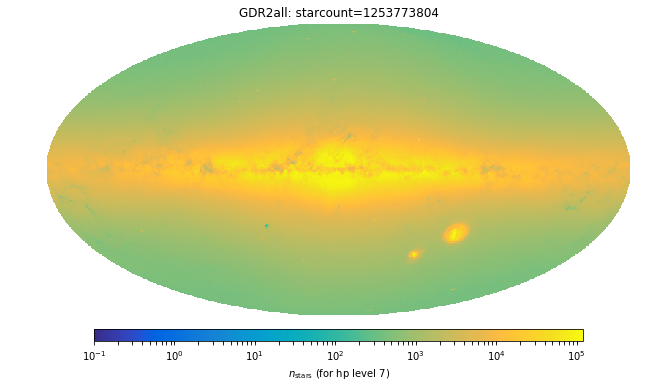

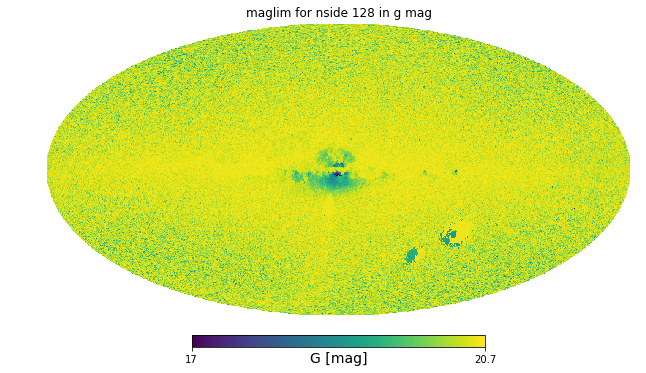

In [8]:
# In what follows we look at the mode of the gmag distibution per healpix over the sky.

folder = 'data/all_magnitudes/for_GDR3mock_comparison/'
data_all = np.load(folder + 'result.npy')
bins_all = np.load(folder + 'all_bins.npy')
maglim = last_complete_bin(data_all,bins_all)
gdr2 = density_sky(data_all)
plot_mollweide_log(gdr2)
band = 'g'
for nside in [128]:
    maglim = last_complete_bin(data_all,bins_all)
    plot_mollweide_linear(maglim, band)
    np.save("data/maglim/maglim_%s_in_nside%d.npy" %(band,nside),maglim)
    data_all = decrease_hpx(data_all,1)

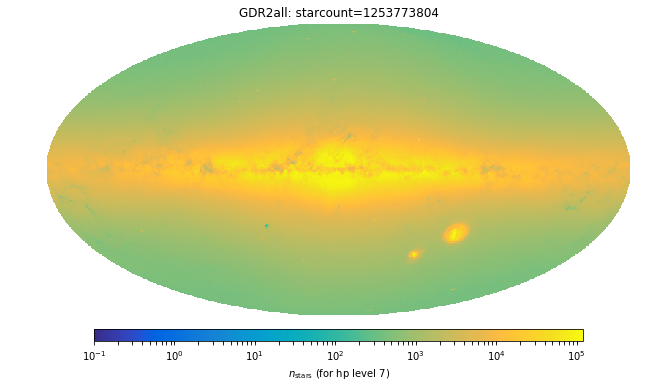

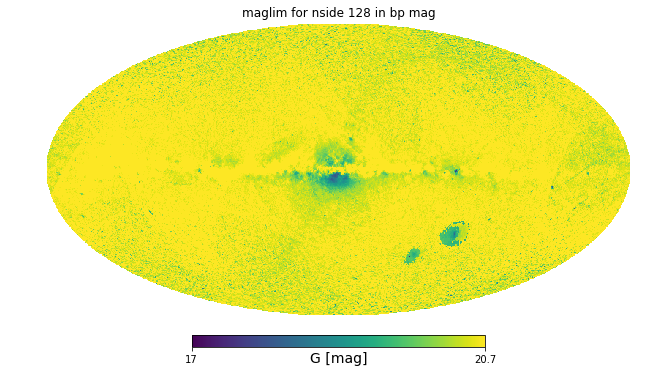

In [9]:
folder = 'data/all_magnitudes/for_GDR3mock_comparison_bp/'
data_all = np.load(folder + 'result.npy')
bins_all = np.load(folder + 'all_bins.npy')
maglim = last_complete_bin(data_all,bins_all)
gdr2 = density_sky(data_all)
plot_mollweide_log(gdr2)
band = 'bp'
for nside in [128]:
    maglim = last_complete_bin(data_all,bins_all)
    plot_mollweide_linear(maglim, band)
    np.save("data/maglim/maglim_%s_in_nside%d.npy" %(band,nside),maglim)
    data_all = decrease_hpx(data_all,1)

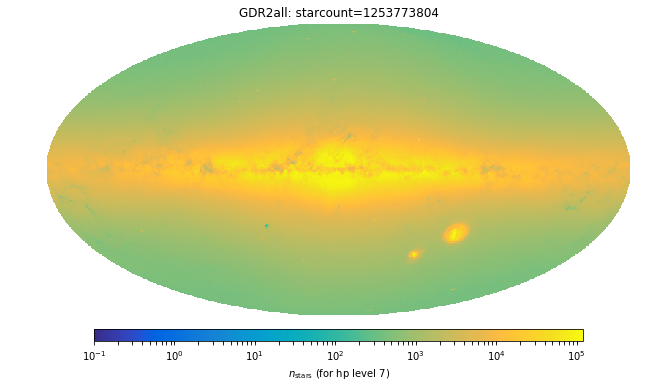

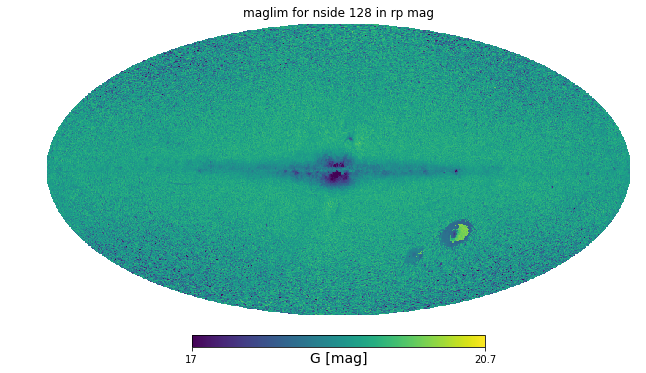

In [10]:
folder = 'data/all_magnitudes/for_GDR3mock_comparison_rp/'
data_all = np.load(folder + 'result.npy')
bins_all = np.load(folder + 'all_bins.npy')
maglim = last_complete_bin(data_all,bins_all)
gdr2 = density_sky(data_all)
plot_mollweide_log(gdr2)
band = 'rp'
for nside in [128]:
    maglim = last_complete_bin(data_all,bins_all)
    plot_mollweide_linear(maglim, band)
    np.save("data/maglim/maglim_%s_in_nside%d.npy" %(band,nside),maglim)
    data_all = decrease_hpx(data_all,1)

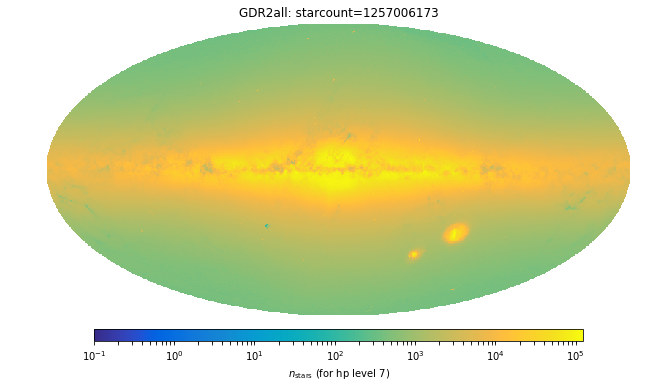

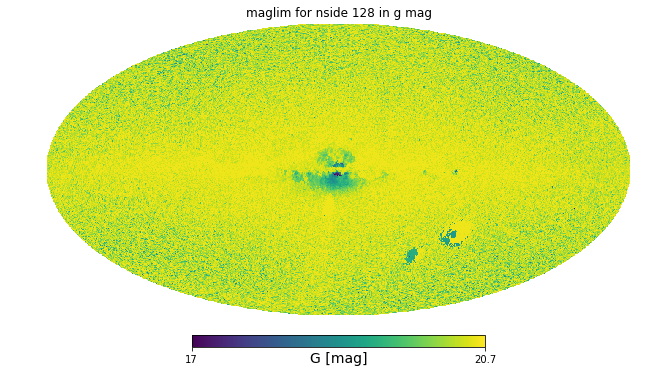

In [11]:
folder = 'data/all_magnitudes/for_GDR3mock_comparison_g_rp/'
data_all = np.load(folder + 'result.npy')
bins_all = np.load(folder + 'all_bins.npy')
maglim = last_complete_bin(data_all,bins_all)
gdr2 = density_sky(data_all)
plot_mollweide_log(gdr2)
band = 'g'
for nside in [128]:
    maglim = last_complete_bin(data_all,bins_all)
    plot_mollweide_linear(maglim, band)
    np.save("data/maglim/maglim_%s_in_nside%d.npy" %(band,nside),maglim)
    data_all = decrease_hpx(data_all,1)

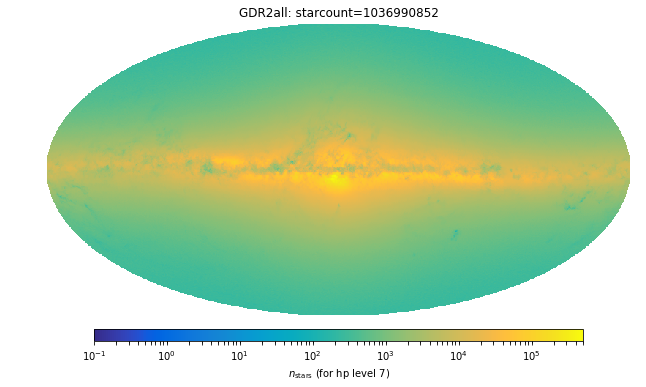

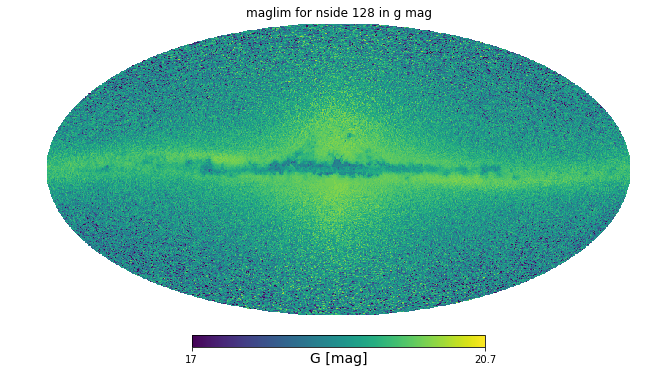

In [12]:
folder = 'data/all_magnitudes/for_GDR3mock_comparison_g_GDR2mock/'
data_all = np.load(folder + 'result.npy')
bins_all = np.load(folder + 'all_bins.npy')
maglim = last_complete_bin(data_all,bins_all)
gdr2 = density_sky(data_all)
plot_mollweide_log(gdr2)
band = 'g'
for nside in [128]:
    maglim = last_complete_bin(data_all,bins_all)
    plot_mollweide_linear(maglim, band)
    #np.save("data/maglim/maglim_%s_in_nside%d.npy" %(band,nside),maglim)
    data_all = decrease_hpx(data_all,1)

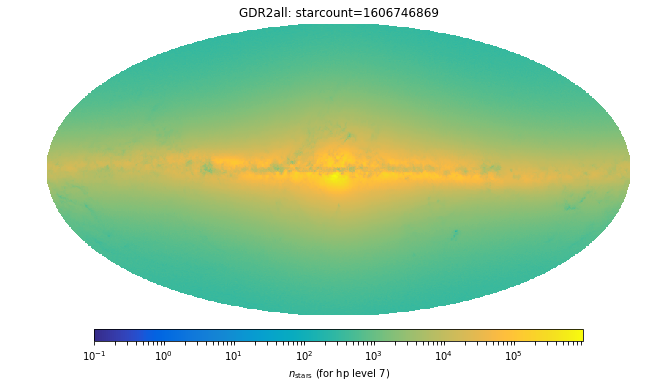

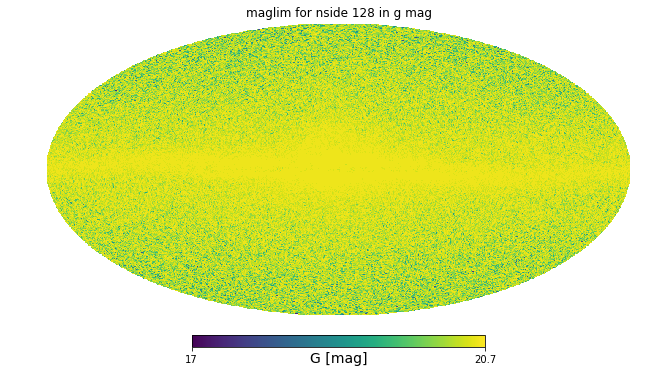

In [13]:
folder = 'data/all_magnitudes/for_GDR3mock_comparison_g_GDR2mock_rp_only/'
data_all = np.load(folder + 'result.npy')
bins_all = np.load(folder + 'all_bins.npy')
maglim = last_complete_bin(data_all,bins_all)
gdr2 = density_sky(data_all)
plot_mollweide_log(gdr2)
band = 'g'
for nside in [128]:
    maglim = last_complete_bin(data_all,bins_all)
    plot_mollweide_linear(maglim, band)
    #np.save("data/maglim/maglim_%s_in_nside%d.npy" %(band,nside),maglim)
    data_all = decrease_hpx(data_all,1)

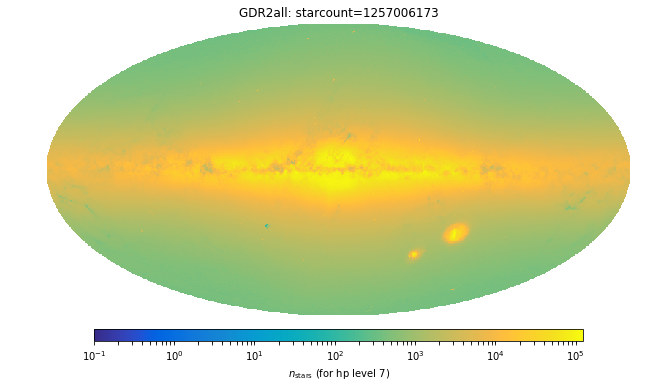

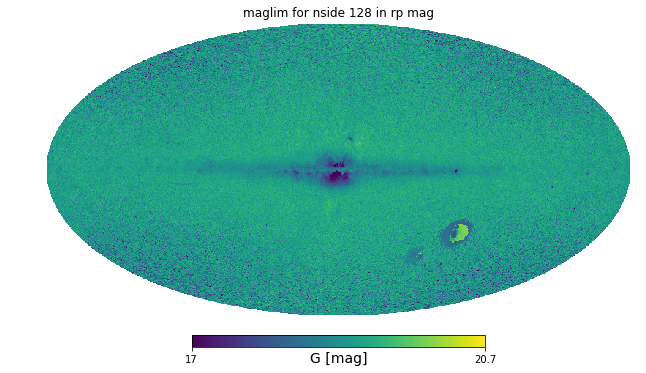

In [14]:
# Do we need to cut in RP as well? It might be that the RP peak comes from the cut in G. 
# Therefore the fainter sources might be well behaved

folder = 'data/all_magnitudes/for_GDR3mock_comparison_rp_g/'
data_all = np.load(folder + 'result.npy')
bins_all = np.load(folder + 'all_bins.npy')
maglim = last_complete_bin(data_all,bins_all)
gdr2 = density_sky(data_all)
plot_mollweide_log(gdr2)
band = 'rp'
for nside in [128]:
    maglim = last_complete_bin(data_all,bins_all)
    plot_mollweide_linear(maglim, band)
    np.save("data/maglim/maglim_%s_in_nside%d.npy" %(band,nside),maglim)
    data_all = decrease_hpx(data_all,1)

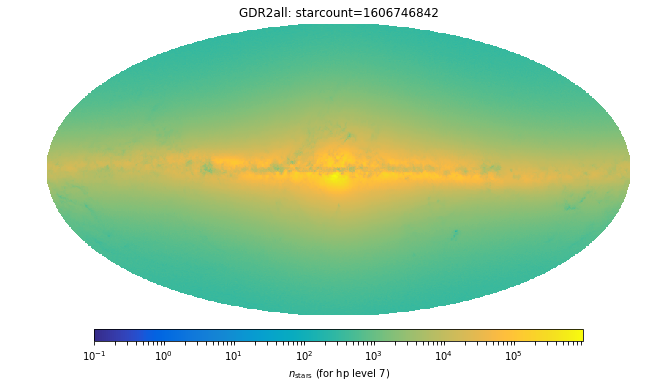

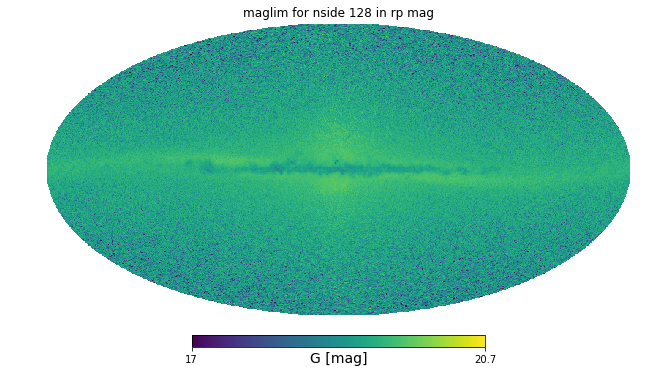

In [15]:
folder = 'data/all_magnitudes/for_GDR3mock_comparison_rp_GDR2mock_rp_only/'
data_all = np.load(folder + 'result.npy')
bins_all = np.load(folder + 'all_bins.npy')
maglim = last_complete_bin(data_all,bins_all)
gdr2 = density_sky(data_all)
plot_mollweide_log(gdr2)
band = 'rp'
for nside in [128]:
    maglim = last_complete_bin(data_all,bins_all)
    plot_mollweide_linear(maglim, band)
    #np.save("data/maglim/maglim_%s_in_nside%d.npy" %(band,nside),maglim)
    data_all = decrease_hpx(data_all,1)

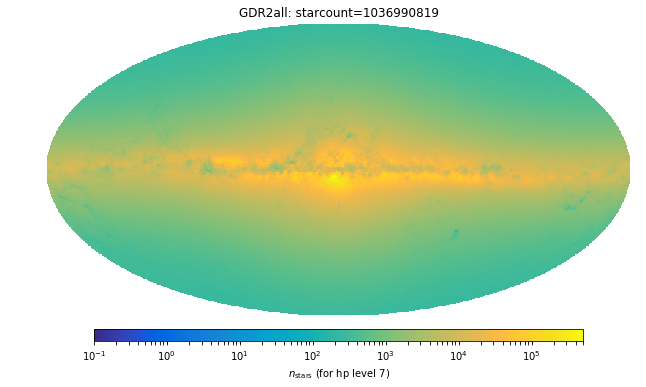

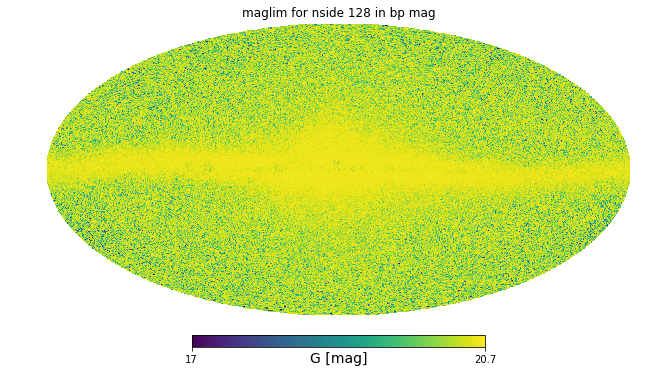

In [16]:
folder = 'data/all_magnitudes/for_GDR3mock_comparison_bp_GDR2mock_bp_only/'
data_all = np.load(folder + 'result.npy')
bins_all = np.load(folder + 'all_bins.npy')
maglim = last_complete_bin(data_all,bins_all)
gdr2 = density_sky(data_all)
plot_mollweide_log(gdr2)
band = 'bp'
for nside in [128]:
    maglim = last_complete_bin(data_all,bins_all)
    plot_mollweide_linear(maglim, band)
    #np.save("data/maglim/maglim_%s_in_nside%d.npy" %(band,nside),maglim)
    data_all = decrease_hpx(data_all,1)